In [4]:
from datasets import load_dataset

ds = load_dataset("Adelante/sentiment_analysis_v1")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data = pd.DataFrame({
    "label":ds['train']['sentiment_label']
})

from datasets import load_dataset

ds2 = load_dataset("Adelante/arabic-qa-largebatch")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设你的数据集是一个DataFrame，每一行代表一个样本，标签存储在 'label' 列中
data2 = pd.DataFrame({
    "label":ds2['train']['问题1-文字']
})


data, data2

C:\Users\黄柏喻\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(      label
 0      相对满意
 1      相对满意
 2      相对不满
 3      相对满意
 4      相对不满
 ...     ...
 28235  相对不满
 28236  相对不满
 28237  相对不满
 28238  相对不满
 28239    中立
 
 [28240 rows x 1 columns],
       label
 0        中立
 1      中度负面
 2      中度负面
 3      中度负面
 4        中立
 ...     ...
 28235  极其负面
 28236  中度负面
 28237  中度负面
 28238  中度负面
 28239  中度负面
 
 [28240 rows x 1 columns])

In [87]:
label_counts = data['label'].value_counts()

# 计算每个标签的数量
label_counts = data.value_counts()

#---------------------------------------------------------

# 排除掉标签为'E'的数据
data_filtered = data2[data2['label'] != 0]

label_counts2 = data_filtered['label'].value_counts()

# 计算每个标签的数量
label_counts2 = data2.value_counts()


In [88]:
dict(label_counts), dict(label_counts2)

({('相对不满',): 21385,
  ('相对满意',): 3694,
  ('非常不满',): 2288,
  ('中立',): 833,
  ('非常满意',): 40},
 {('中度负面',): 19295,
  ('极其负面',): 5608,
  ('中立',): 2518,
  ('强烈负面',): 549,
  ('中度正面',): 222,
  ('强烈正面',): 45,
  ('0',): 3})

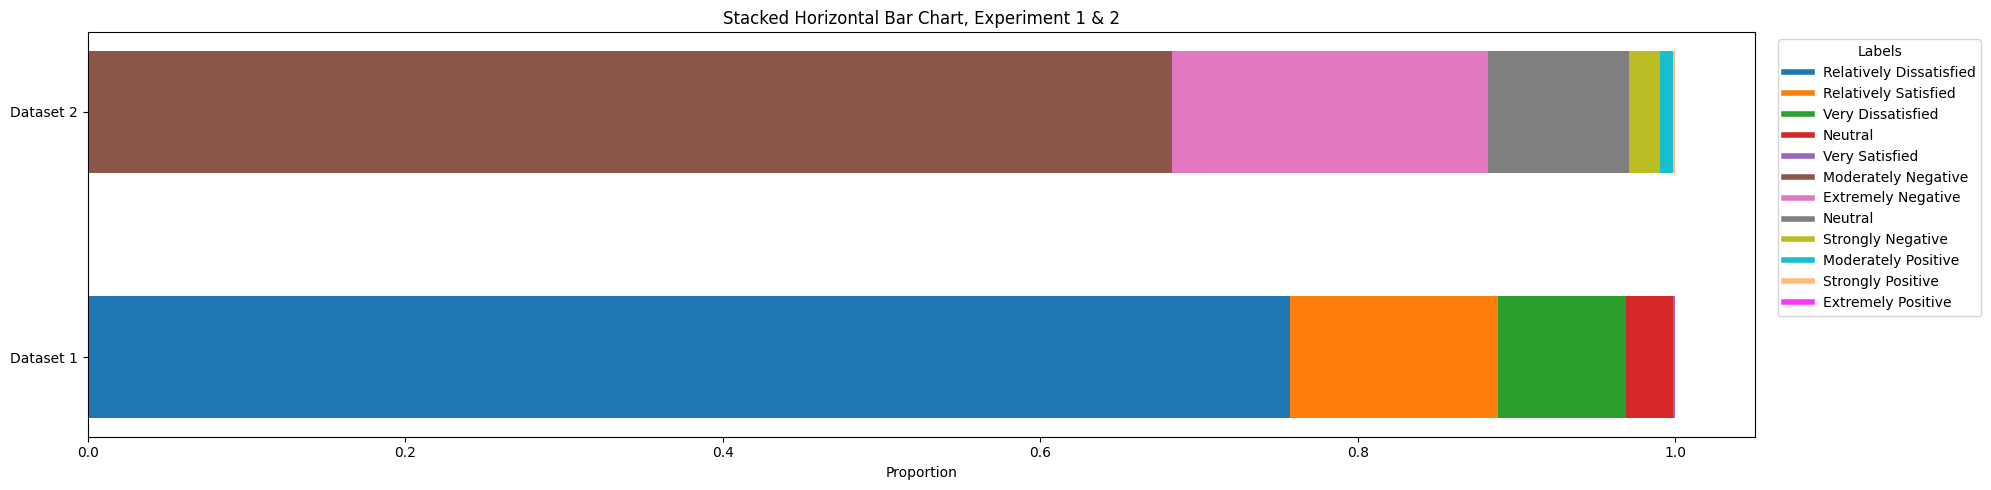

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# 模拟的数据集
dataset1 = list(dict(label_counts).values())  # dataset1的类别分布（5类）
dataset2 = list(dict(label_counts2).values())  # dataset2的类别分布（7类）

# 类别标签
labels1 = [
        'Relatively Dissatisfied',
        'Relatively Satisfied',
        'Very Dissatisfied',
        'Neutral',
        'Very Satisfied'
    ]
labels2 = [
    'Moderately Negative',
    'Extremely Negative',
    'Neutral',
    'Strongly Negative',
    'Moderately Positive',
    'Strongly Positive',
    'Extremely Positive'
]

# 自定义颜色
colors1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # dataset1的颜色
colors2 = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78','#ff33ff']  # dataset2的颜色

# 对数据集进行归一化
dataset1_normalized = np.array(dataset1) / sum(dataset1)
dataset2_normalized = np.array(dataset2) / sum(dataset2)

bar_height=0.5

# 绘制堆叠水平柱状图
fig, ax = plt.subplots(figsize=(20, 5))

# 绘制第一个数据集的堆叠水平柱状图
ax.barh(0, dataset1_normalized[0], color=colors1[0], label=labels1[0], height=bar_height)
left = dataset1_normalized[0]
for i in range(1, len(dataset1_normalized)):
    ax.barh(0, dataset1_normalized[i], left=left, color=colors1[i], label=labels1[i] if i == len(dataset1_normalized)-1 else "", height=bar_height)
    left += dataset1_normalized[i]

# 绘制第二个数据集的堆叠水平柱状图
ax.barh(1, dataset2_normalized[0], color=colors2[0], label=labels2[0], height=bar_height)
left = dataset2_normalized[0]
for i in range(1, len(dataset2_normalized)):
    ax.barh(1, dataset2_normalized[i], left=left, color=colors2[i], label=labels2[i] if i == len(dataset2_normalized)-1 else "", height=bar_height)
    left += dataset2_normalized[i]

# 设置标签和标题
ax.set_xlabel('Proportion')
ax.set_title('Stacked Horizontal Bar Chart, Experiment 1 & 2')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Dataset 1', 'Dataset 2'])

# 创建两个图例组，分别表示dataset1和dataset2的标签
legend1 = [Line2D([0], [0], color=colors1[i], lw=4) for i in range(len(colors1))]
legend2 = [Line2D([0], [0], color=colors2[i], lw=4) for i in range(len(colors2))]
# 设置图例，并将legend1和legend2合并到一个图例中
ax.legend(legend1 + legend2, labels1 + labels2, title="Labels", loc='upper left', bbox_to_anchor=(1.01, 1), ncol=1)



# 显示图形
plt.tight_layout()
plt.savefig('stacked_bar_chart.png', dpi=300, bbox_inches='tight')  # 保存为PNG文件，dpi设置为300，保证图像清晰度

plt.show()
